# Erronka 1

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

df_movies = pd.read_csv('movies.csv')
df_links = pd.read_csv('links.csv')
df_ratings = pd.read_csv('ratings.csv')
df_tags = pd.read_csv('tags.csv')

'''
df = pd.merge(df_movies, df_links, on='movieId', how='left')
df.head()
'''

df_links.head()

,movieId,imdbId,tmdbId
0,45,114681,577.0
1,103,118040,2045.0
2,118,116606,10324.0
3,152,112288,34996.0
4,209,114928,31611.0


## Intento de borrar valores nulos

In [300]:
print(len(df_links))
df_links.dropna()
df_links.mask(df_links.eq('None')).dropna()
print(len(df_links))

1500
1500


In [301]:
print(len(df_movies))
df_movies.dropna()
df_movies.mask(df_movies.eq('None')).dropna()
print(len(df_movies))

1500
1500


In [302]:
print(len(df_ratings))
df_ratings.dropna()
df_ratings.mask(df_ratings.eq('None')).dropna()
print(len(df_ratings))

503673
503673


In [303]:
print(len(df_tags))
df_tags.dropna()
df_tags.mask(df_tags.eq('None')).dropna()
print(len(df_tags))

35139
35139


## Juntar dataframes

In [304]:
df = pd.merge(df_movies, df_links, on='movieId', how='left')
df = pd.merge(df, df_tags, on='movieId', how='left')
#df = pd.merge(df, df_ratings, on='movieId', how='left')
print(df.shape)
df.head()

(35764, 11)


,movieId,title,genres,year,director,actors,imdbId,tmdbId,userId,tag,timestamp
0,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,high tech surveillance,1.527060e+09
1,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,mystery killer,1.527060e+09
2,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sex party,1.527060e+09
3,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sexual murder,1.527060e+09
4,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,whodunit,1.527060e+09


In [305]:
print(df['year'].min())
print(df['year'].max())
print(df['timestamp'].min())
print(df['timestamp'].max())

1080.0
9500.0
1136774842.0
1697023944.0


In [306]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,movieId,title,genres,year,director,actors,imdbId,tmdbId,userId,tag,timestamp
0,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,high tech surveillance,2018-05-23 07:27:58
1,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,mystery killer,2018-05-23 07:27:58
2,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sex party,2018-05-23 07:27:58
3,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sexual murder,2018-05-23 07:27:58
4,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,whodunit,2018-05-23 07:27:58


## Limpieza de datos
Habia valores de años de pelicula que no tenian sentido. Tambien habia valores de titulo, genero, director, actores y timestamps que no tenian ningun valor. Estos datos los hemos eliminado, pasando de un dataframe con 35764 datos a otro nuevo con 34147.

In [307]:
anio_minimo = 1888
anio_maximo = datetime.now().year

print(df.shape)
df = df.drop(df[df.year<anio_minimo].index)
df = df.drop(df[df.year>anio_maximo].index)
print(df.shape)
df.head()

(35764, 11)
(35654, 11)


,movieId,title,genres,year,director,actors,imdbId,tmdbId,userId,tag,timestamp
0,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,high tech surveillance,2018-05-23 07:27:58
1,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,mystery killer,2018-05-23 07:27:58
2,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sex party,2018-05-23 07:27:58
3,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sexual murder,2018-05-23 07:27:58
4,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,whodunit,2018-05-23 07:27:58


In [308]:
vacio = ''
print(df.shape)
categorias_string = ['title', 'genres', 'director', 'actors', 'timestamp']
df[categorias_string] = df[categorias_string].replace(vacio, np.nan)
df = df.dropna(subset=categorias_string)
print(df.shape)
df.head()

(35654, 11)
(34147, 11)


,movieId,title,genres,year,director,actors,imdbId,tmdbId,userId,tag,timestamp
0,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,high tech surveillance,2018-05-23 07:27:58
1,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,mystery killer,2018-05-23 07:27:58
2,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sex party,2018-05-23 07:27:58
3,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sexual murder,2018-05-23 07:27:58
4,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,whodunit,2018-05-23 07:27:58


In [309]:
#Codigo para descargar el dataframe en un csv
df.to_csv('merged_movies.csv')

# Visualizacion datos
## Plotear peliculas en base a generos, visualizar años en tramos de 5 años, numero de peliculas de cada director, cuantas pelis tiene un actor...

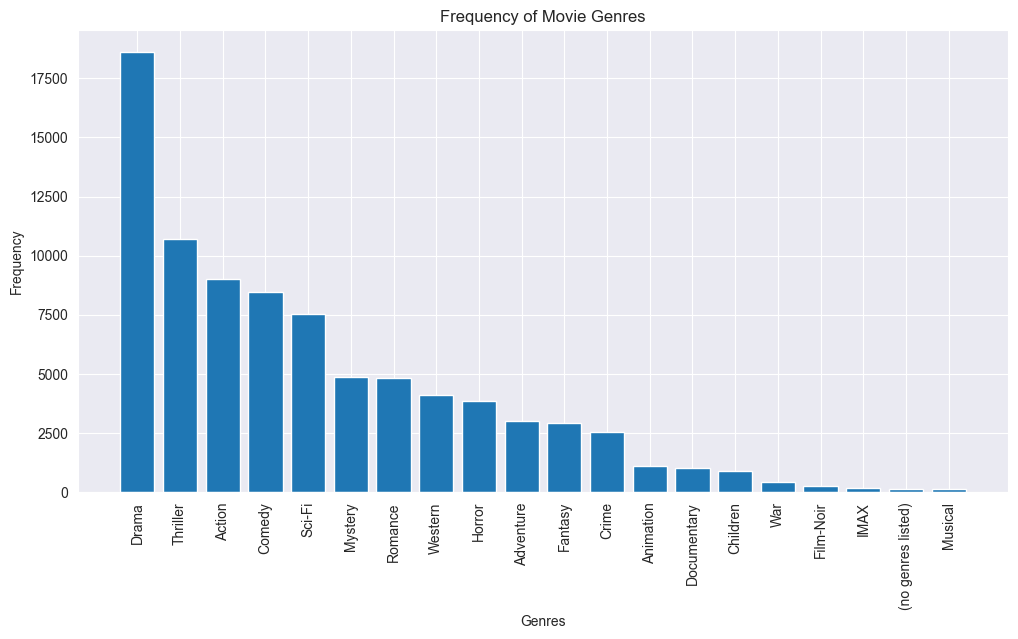

In [310]:
genres_exploded = df['genres'].str.split('|').explode()
genre_counts = genres_exploded.value_counts()

plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequency of Movie Genres')
plt.show()


In [311]:
df.head()

,movieId,title,genres,year,director,actors,imdbId,tmdbId,userId,tag,timestamp
0,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,high tech surveillance,2018-05-23 07:27:58
1,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,mystery killer,2018-05-23 07:27:58
2,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sex party,2018-05-23 07:27:58
3,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sexual murder,2018-05-23 07:27:58
4,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,whodunit,2018-05-23 07:27:58


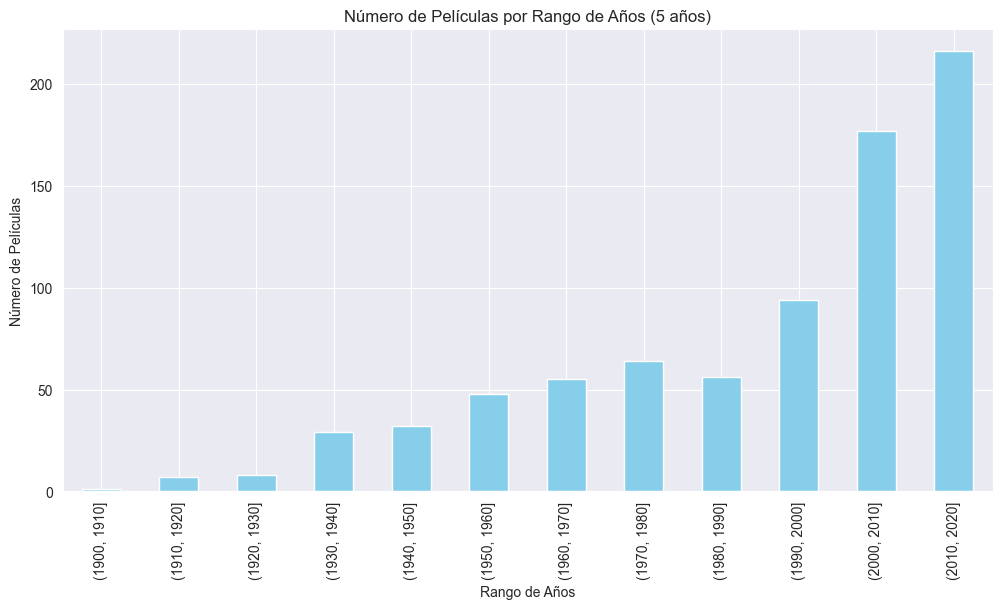

In [312]:
pelicula = df.groupby(['movieId', 'title', 'year']).size().reset_index(name='count')
rango_anios = np.arange(1900, anio_maximo + 5, 10)
# Crear categorías de rango de años
pelicula['rango_anios'] = pd.cut(pelicula['year'], bins=rango_anios)

# Contar cuántas películas hay en cada rango
conteo_por_rango = pelicula.groupby('rango_anios')['movieId'].nunique()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
conteo_por_rango.plot(kind='bar', color='skyblue')

# Etiquetas y título
plt.xlabel('Rango de Años')
plt.ylabel('Número de Películas')
plt.title('Número de Películas por Rango de Años (5 años)')
plt.xticks(rotation=90)
plt.show()

In [313]:
df.director

0            Paolo Cavara
1            Paolo Cavara
2            Paolo Cavara
3            Paolo Cavara
4            Paolo Cavara
               ...       
35757    Yorgos Lanthimos
35758    Yorgos Lanthimos
35759    Yorgos Lanthimos
35760    Yorgos Lanthimos
35761    Yorgos Lanthimos
Name: director, Length: 34147, dtype: object

In [314]:
len(df.director.unique())

753

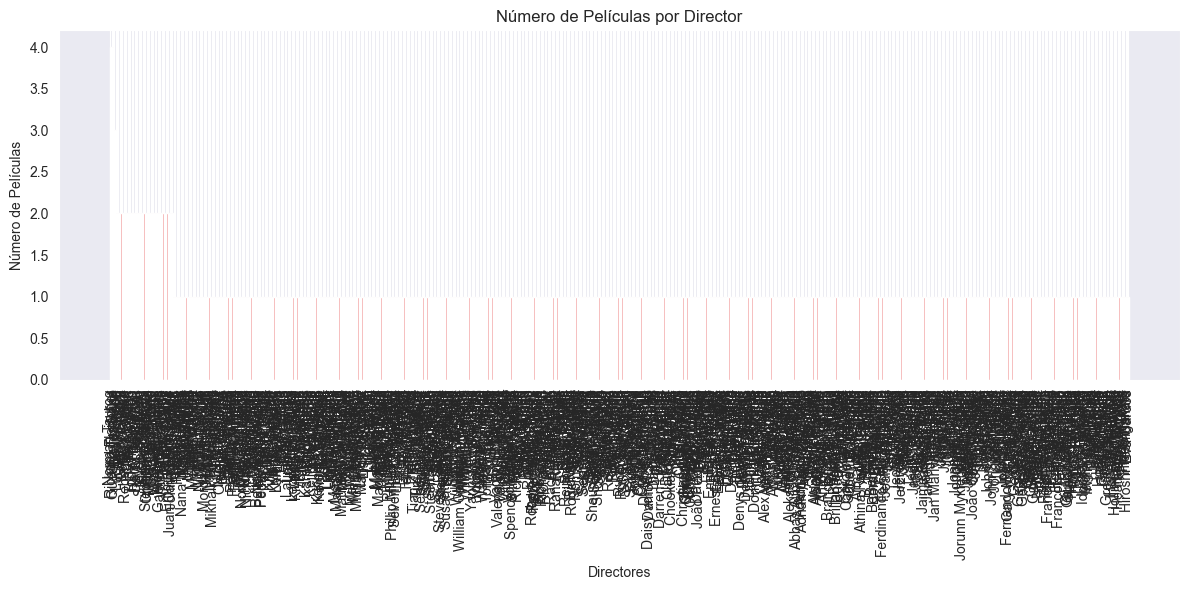

In [315]:
peliculas_por_director = df.groupby('director')['movieId'].nunique().reset_index()

peliculas_por_director.columns = ['director', 'num_movies']

peliculas_por_director = peliculas_por_director.sort_values(by='num_movies', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(peliculas_por_director['director'], peliculas_por_director['num_movies'], color='lightcoral')

plt.xlabel('Directores')
plt.ylabel('Número de Películas')
plt.title('Número de Películas por Director')
plt.xticks(rotation=90)  # Rotar los nombres de los directores para que sean legibles
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para evitar que se solapen los elementos
plt.show()


In [316]:
peliculas_por_director

,director,num_movies
519,Norman Taurog,4
582,Richard Fleischer,4
564,Quentin Tarantino,4
96,Charles Band,3
438,Lloyd Bacon,3
...,...,...
265,Henry Levin,1
266,Herbert Ross,1
267,Hideo Nakata,1
268,Hiroshi Teshigahara,1


C:\Users\joane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


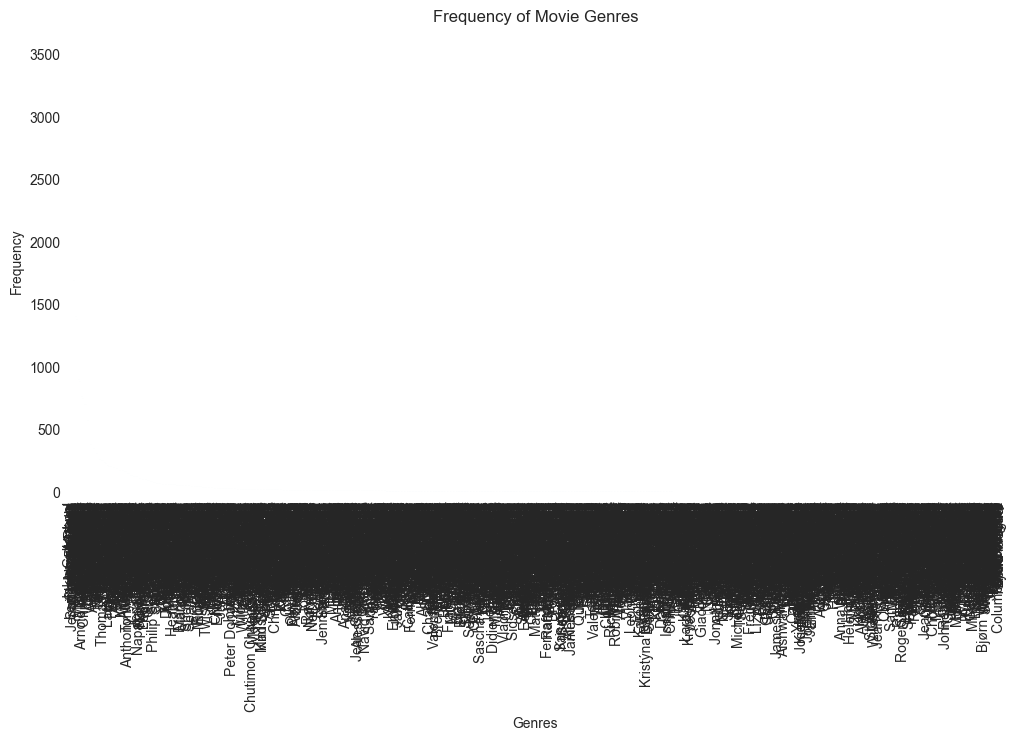

In [317]:
actors_exploded = df['actors'].str.split(', ').explode()
actors_counts = actors_exploded.value_counts()

plt.figure(figsize=(12, 6))
actors_counts.plot(kind='bar', color='skyblue')
#plt.bar(actors_counts.index, actors_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequency of Movie Genres')
plt.show()

In [318]:
actors_counts

actors
Jake Gyllenhaal      3517
James Duval          3260
Jena Malone          3260
Christoph Waltz      2351
Leonardo DiCaprio    2351
                     ... 
Therese Pare            1
Columba Domínguez       1
Roscoe Born             1
Lydia Wagner            1
Tetsuo Ishidate         1
Name: count, Length: 2183, dtype: int64

## Unir con ratings
Intentamos juntarlo con ratings. Como hay demasiados ratings, intentaremos hacer la media por pelicula, y añadirlo a una nueva columna de cada pelicula

In [319]:
df.head()

,movieId,title,genres,year,director,actors,imdbId,tmdbId,userId,tag,timestamp
0,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,high tech surveillance,2018-05-23 07:27:58
1,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,mystery killer,2018-05-23 07:27:58
2,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sex party,2018-05-23 07:27:58
3,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,sexual murder,2018-05-23 07:27:58
4,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,whodunit,2018-05-23 07:27:58


In [320]:
df.shape

(34147, 11)

In [321]:
df_tags_agrupados = df.groupby('movieId')['tag'].apply(lambda x: '|'.join(x.dropna().astype(str))).reset_index()

df_sin_tags = df.drop(columns=['tag']).drop_duplicates(subset=['movieId'])  # Eliminar duplicados excepto por movieId
df_merged = pd.merge(df_sin_tags, df_tags_agrupados, on='movieId', how='left')

# Ver los primeros resultados
df = df_merged.copy()
df.head()


,movieId,title,genres,year,director,actors,imdbId,tmdbId,userId,timestamp,tag
0,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,2018-05-23 07:27:58,high tech surveillance|mystery killer|sex part...
1,185001,I Feel Pretty,Comedy,2018.0,Abby Kohn,"Amy Schumer, Michelle Williams, Tom Hopper",6791096,460668.0,18240.0,2018-06-29 23:20:55,funny|body positive|delusion|funny|Girl Power|...
2,141038,Get a Clue,Children|Comedy|Mystery,2002.0,Maggie Greenwald,"Lindsay Lohan, Bug Hall, Ian Gomez",282521,26189.0,62453.0,2018-08-12 17:06:00,Disney Channel Original Movie|amateur detectiv...
3,169786,Midnight Diner,Drama,2014.0,Jōji Matsuoka,"Kaoru Kobayashi, Saki Takaoka, Mikako Tabe",3958276,309028.0,78213.0,2018-05-24 05:36:29,based on tv series|restaurant
4,116919,The Johnstown Flood,Drama,1926.0,Irving Cummings,"George O’Brien, Florence Gilbert, Janet Gaynor",17010,290054.0,78213.0,2018-05-18 05:19:09,flood


In [322]:
df.shape

(808, 11)

In [323]:
media_valoraciones = df_ratings.groupby('movieId')['rating'].mean().reset_index()
df = pd.merge(df, media_valoraciones, on='movieId', how='left')

df['rating'] = round(df['rating'], 2)

df.rename(columns={'rating': 'valoracion_media'}, inplace=True)

df.head()

,movieId,title,genres,year,director,actors,imdbId,tmdbId,userId,timestamp,tag,valoracion_media
0,126809,Plot of Fear,Crime|Mystery|Thriller,1976.0,Paolo Cavara,"Corinne Cléry, Michele Placido, Quinto Parmegg...",74451,63112.0,78213.0,2018-05-23 07:27:58,high tech surveillance|mystery killer|sex part...,2.50
1,185001,I Feel Pretty,Comedy,2018.0,Abby Kohn,"Amy Schumer, Michelle Williams, Tom Hopper",6791096,460668.0,18240.0,2018-06-29 23:20:55,funny|body positive|delusion|funny|Girl Power|...,2.90
2,141038,Get a Clue,Children|Comedy|Mystery,2002.0,Maggie Greenwald,"Lindsay Lohan, Bug Hall, Ian Gomez",282521,26189.0,62453.0,2018-08-12 17:06:00,Disney Channel Original Movie|amateur detectiv...,2.64
3,169786,Midnight Diner,Drama,2014.0,Jōji Matsuoka,"Kaoru Kobayashi, Saki Takaoka, Mikako Tabe",3958276,309028.0,78213.0,2018-05-24 05:36:29,based on tv series|restaurant,3.50
4,116919,The Johnstown Flood,Drama,1926.0,Irving Cummings,"George O’Brien, Florence Gilbert, Janet Gaynor",17010,290054.0,78213.0,2018-05-18 05:19:09,flood,3.00


In [324]:
#Ordenar dataframe en base a la valoracion media
df.sort_values('valoracion_media', ascending=False, inplace=True)
df.head()

,movieId,title,genres,year,director,actors,imdbId,tmdbId,userId,timestamp,tag,valoracion_media
175,112990,"Pursuit of Unhappiness, The (Anleitung zum Ung...",Romance,2012.0,Sherry Hormann,"Johanna Wokalek, Iris Berben, David Kross",1951076,136616.0,78213.0,2018-05-19 00:15:54,woman director,5.0
611,192827,Jawani Phir Nahi Ani 2,Comedy,2018.0,Nadeem Baig,"Humayun Saeed, Fahad Mustafa, Ahmad Ali Butt",7816386,544402.0,114966.0,2018-08-26 17:23:44,Colorfull|Comedy|Plot Twists|Pop culture refer...,5.0
340,276819,For the Love of Nancy,Drama,1994.0,Paul Schneider,"Tracey Gold, Jill Clayburgh, Cameron Bancroft",109822,108243.0,126678.0,2022-07-21 00:23:33,bad parenting|eating disorder|group therapy|Li...,5.0
585,131922,Private Duty Nurses,(no genres listed),1971.0,George Armitage,"Katherine Cannon, Joyce Williams, Pegi Boucher",67618,85964.0,78213.0,2018-05-18 04:37:25,drugs|exploitation|hospital|New World Pictures...,5.0
216,135232,Jailbait Babysitter,Comedy,1977.0,John Hayes,"Therese Pare, Roscoe Born, Lydia Wagner",77762,86210.0,78213.0,2018-05-19 00:09:42,babysitter,5.0


0.5

In [326]:
df.to_csv('merged_movies.csv')

In [332]:
print(df_ratings.shape)
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s')
df_ratings.sort_values('movieId', ascending=True, inplace=True)
df_ratings.head()

(503673, 4)


,userId,movieId,rating,timestamp
133237,53005,45,3.0,2001-06-15 03:55:35
172986,68862,45,5.0,1998-02-17 12:38:51
408676,163022,45,4.0,2002-09-02 22:49:15
173168,68928,45,3.5,2017-03-20 07:15:56
416311,166065,45,1.0,1999-12-12 00:18:28


In [333]:
df_ratings.to_csv('ratings.csv')